# Stratified Sampling Using Titanic Dataset (Bonus Assignment)

## You will use the Titanic dataset to apply Stratified Sampling.

### Data: https://www.kaggle.com/competitions/titanic/overview

## Task 1: Load and Explore the Titanic Dataset
### Display the first few rows of the dataset to get an overview of the structure.
### Generate summary statistics for the numerical columns.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(r"C:\Users\User\Downloads\train.csv")

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Task 2: Identify the Strata

In the Titanic dataset, a common stratification attribute is Survived, which indicates whether a passenger survived (1) or did not survive (0). I could also stratify based on Pclass (Passenger class) or Sex, as these variables may significantly affect the outcome.

For example, strata can be created using the Survived column:

Stratum 1: Passengers who survived (Survived = 1)
Stratum 2: Passengers who did not survive (Survived = 0)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x=(df['Survived'].value_counts())/len(df)*100
x

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

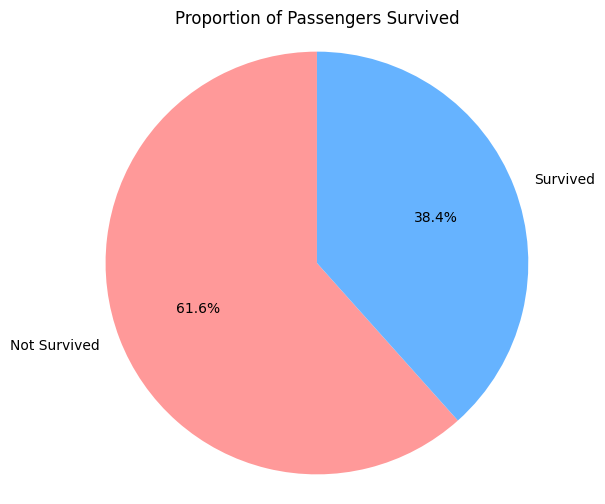

In [ ]:
labels = ['Not Survived', 'Survived']

plt.figure(figsize=(6, 6))
plt.pie(x, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of Passengers Survived')
plt.axis('equal')
plt.show()

## Task 3: Implement Stratified Sampling

In [ ]:
#Disproportionate Samplings
#Randomly select 4 sample from each strata

In [ ]:
dis_sam=df.groupby('Survived',group_keys=False).apply(lambda x: x.sample(4))
dis_sam

C:\Users\User\AppData\Local\Temp\ipykernel_17916\2685970053.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dis_sam=df.groupby('Survived',group_keys=False).apply(lambda x: x.sample(4))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q


In [ ]:
#Propotional sample

In [ ]:
pro_sam=df.groupby('Survived',group_keys=False).apply(lambda x: x.sample(frac=0.01))
pro_sam

C:\Users\User\AppData\Local\Temp\ipykernel_17916\2524473075.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pro_sam=df.groupby('Survived',group_keys=False).apply(lambda x: x.sample(frac=0.01))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C


### Task 4: Summary

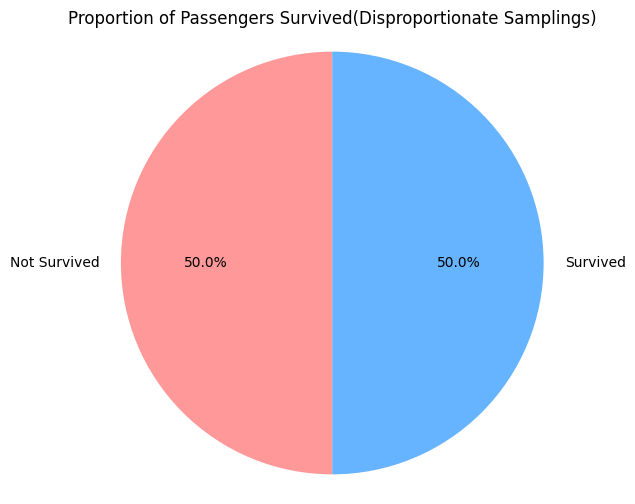

In [ ]:
labels = ['Not Survived', 'Survived']

plt.figure(figsize=(6, 6))
plt.pie((dis_sam['Survived'].value_counts())/len(df)*100, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of Passengers Survived(Disproportionate Samplings)')
plt.axis('equal')
plt.show()

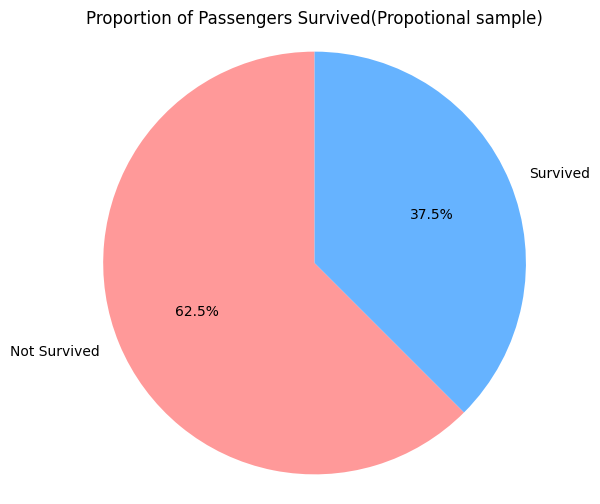

In [ ]:
labels = ['Not Survived', 'Survived']

plt.figure(figsize=(6, 6))
plt.pie((pro_sam['Survived'].value_counts())/len(df)*100, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of Passengers Survived(Propotional sample)')
plt.axis('equal')
plt.show()